In [1]:
import requests
import random
import pandas as pd
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)
json = r.json()
pd.set_option('max_columns', None)

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [2]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]
slim_df = elements_df[['minutes','goals_scored','assists','web_name','points_per_game']]
slim_df_2 = elements_df[['web_name','total_points','clean_sheets','element_type','goals_conceded','points_per_game']]
slim_df_2['g+c'] = slim_df_2['goals_conceded']/slim_df_2['clean_sheets']
slim_df_2_d = slim_df_2.loc[slim_df_2.element_type ==2]
slim_df_2_g = slim_df_2.loc[slim_df_2.element_type ==1]

C:\Users\sus85\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [3]:
slim_df['a+g_per90'] = slim_df['minutes']/(slim_df['goals_scored'] + slim_df['assists'])

C:\Users\sus85\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
df = slim_elements_df.copy()

df.loc[:,'position'] = df.element_type.map(elements_types_df.set_index('id').singular_name)

#print(slim_elements_df.head())

df.loc[:,'value'] = df.value_season.astype(float)
df.loc[:,'team'] = df.team.map(teams_df.set_index('id').name)


df['value'] = df.value_season.astype(float)
df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

df = df.loc[df.value > 0]

pivot = df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
team_pivot = df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

fwd_df = df.loc[df.position == 'Forward']
mid_df = df.loc[df.position == 'Midfielder']
def_df = df.loc[df.position == 'Defender']
goal_df = df.loc[df.position == 'Goalkeeper']


In [5]:
print(fwd_df.sort_values('value',ascending=False).head(10))
print(fwd_df.sort_values('total_points',ascending=False).head(10))

    second_name           team  element_type selected_by_percent  now_cost  \
116       Toney      Brentford             4                30.1        76   
470     Haaland       Man City             4                85.4       122   
131      Mbeumo      Brentford             4                 3.2        58   
575     Johnson  Nott'm Forest             4                 2.1        57   
645        Kane          Spurs             4                38.0       118   
316    Mitrović         Fulham             4                25.0        69   
44      Watkins    Aston Villa             4                 2.8        71   
616       Adams    Southampton             4                 1.6        62   
81      Solanke    Bournemouth             4                 1.8        55   
528      Wilson      Newcastle             4                 3.7        71   

     minutes  transfers_in value_season  total_points position  value  
116     1791       8058036         15.8           120  Forward   15.8

C:\Users\sus85\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


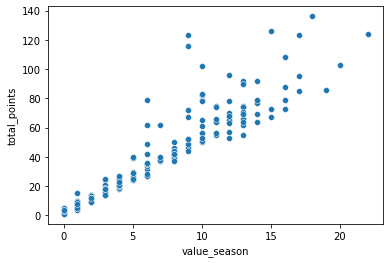

In [6]:
import seaborn as sns
mid_df.value_season = mid_df.value_season.astype(float).astype(int)
sns.scatterplot(mid_df, x='value_season', y='total_points')

C:\Users\sus85\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


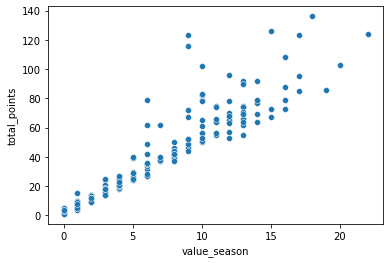

In [7]:
def_df.value_season = mid_df.value_season.astype(float).astype(int)
sns.scatterplot(mid_df, x='value_season', y='total_points')

In [8]:
# print(def_df.sort_values('value',ascending=False).head(10))
print(def_df.sort_values('total_points',ascending=False).head(10))

              second_name       team  element_type selected_by_percent  \
529              Trippier  Newcastle             2                69.5   
538                 Schär  Newcastle             2                17.1   
21                 Saliba    Arsenal             2                35.2   
140                   Mee  Brentford             2                13.1   
13   dos Santos Magalhães    Arsenal             2                13.8   
530                  Burn  Newcastle             2                 4.1   
7                   White    Arsenal             2                13.4   
549                Botman  Newcastle             2                 6.0   
491                  Shaw    Man Utd             2                27.7   
307                  Ream     Fulham             2                 2.2   

     now_cost  minutes  transfers_in  value_season  total_points  position  \
529        61     1954       6528498           NaN           145  Defender   
538        52     1874       

In [9]:
print(goal_df.sort_values('total_points',ascending=False).head(10))

           second_name           team  element_type selected_by_percent  \
548               Pope      Newcastle             1                25.5   
117        Raya Martin      Brentford             1                 9.6   
424      Ramses Becker      Liverpool             1                13.3   
710     Malheiro de Sá         Wolves             1                 5.1   
486    De Gea Quintana        Man Utd             1                10.4   
12            Ramsdale        Arsenal             1                12.1   
304               Leno         Fulham             1                 2.5   
643             Lloris          Spurs             1                 3.8   
579          Henderson  Nott'm Forest             1                 6.9   
460  Santana de Moraes       Man City             1                14.4   

     now_cost  minutes  transfers_in value_season  total_points    position  \
548        55     1980       3638848         19.6           108  Goalkeeper   
117        47   

In [10]:
def data():
    for x in elements_df.index:
        print(x)
        element_id = elements_df.id[x]
        url = f'https://fantasy.premierleague.com/api/element-summary/{element_id}/'
        r = requests.get(url)
        json = r.json()
        json_history_df = pd.DataFrame(json['history'])
        json_history_df['element_type'] = slim_elements_df.element_type[x]
        json_history_df['web_name'] = elements_df.web_name[x]
        json_history_df['value_season'] = elements_df.value_season[x]

        json_history_past_df = pd.DataFrame(json['history_past'])

        if x == 0:
            all_history_df = json_history_df
            all_history_past_df = json_history_past_df
        else:
            all_history_df = all_history_df.append(json_history_df)
            all_history_past_df = all_history_past_df.append(json_history_past_df)

    all_history_df.to_pickle(r'C:\Users\sus85\OneDrive\Desktop\FPL\all_history_df.pickle')

In [11]:
def load_data():
    all_history_df = pd.read_pickle(r'C:\Users\sus85\OneDrive\Desktop\FPL\all_history_df.pickle')

    for x in set(all_history_df.element):
        df = all_history_df.loc[x == all_history_df.element]
        df = df[-4:]
        df['all_points'] = sum(df['total_points'])
        df['all_threats'] = sum([float(x) for x in df['threat'].values])
        df['all_influence'] = sum([float(x) for x in df['influence'].values])
        df['all_creativity'] = sum([float(x) for x in df['creativity'].values])
        df['ict'] = sum([float(x) for x in df['ict_index'].values])
        df['all_bps'] = sum(df['bps'])
        df = df[-1:]
        if x == 1:
            new_history_df = df
        else:
            new_history_df = new_history_df.append(df)

    new_history_df['value_season'] = new_history_df.value_season.astype(float)
    new_history_df = new_history_df.loc[new_history_df.value_season > 0]
    fwd_ = new_history_df.loc[new_history_df.element_type == 4]
    mid = new_history_df.loc[new_history_df.element_type == 3]
    def_d = new_history_df.loc[new_history_df.element_type == 2]
    goal = new_history_df.loc[new_history_df.element_type == 1]

    fwd_ = fwd_.loc[:, ["web_name","all_influence", "all_points", 'value_season', 'all_threats','all_creativity','ict']]
    mid = mid.loc[:, ["web_name","all_influence", "all_points", 'value_season', 'all_threats', 'all_creativity', 'ict']]
    def_d = def_d.loc[:, ["web_name","all_influence","all_bps", "all_points", 'value_season', 'all_threats', 'all_creativity', 'ict']]
    goal = goal.loc[:, ["web_name","all_influence", "all_points", 'value_season', 'all_threats', 'all_creativity', 'ict']]



    # print(fwd_.sort_values('value_season', ascending=False).head(10))
    print('\n')
    print(fwd_.sort_values('all_points', ascending=False).head(15))
    print('\n')
    # print(fwd_.sort_values('ict', ascending=False).head(15))
    print('\n')
    print(fwd_.sort_values('all_influence', ascending=False).head(15))

    # print(mid.sort_values('value_season', ascending=False).head(10))
    print('\n')
    print(mid.sort_values('all_points', ascending=False).head(20))
    print('\n')
    # print(mid.sort_values('ict', ascending=False).head(15))
    print('\n')
    print(mid.sort_values('all_influence', ascending=False).head(15))


    # print(def_d.sort_values('value_season', ascending=False).head(10))
    print('\n')
    print(def_d.sort_values('all_points', ascending=False).head(15))
    print('\n')
    # print(def_d.sort_values('ict', ascending=False).head(15))
    print('\n')
    print(def_d.sort_values('all_influence', ascending=False).head(15))

    # print(goal.sort_values('value_season', ascending=False).head(10))
    print('\n')
    print(goal.sort_values('all_points', ascending=False).head(15))
    print('\n')
    print(goal.sort_values('all_influence', ascending=False).head(15))

In [21]:
# data()
load_data()



     web_name  all_influence  all_points  value_season  all_threats  \
22    Haaland          157.0          29          14.8        127.0   
21  Iheanacho          126.6          28           8.0         88.0   
21    Johnson          143.0          28          13.0        103.0   
21    Watkins          110.0          27          12.1        110.0   
22       Kane           85.8          21          12.7        148.0   
21    Nketiah           82.6          21           7.4        169.0   
21      Toney           83.6          20          15.8        113.0   
21     Mbeumo           68.4          18          13.3         44.0   
16     Gnonto           75.0          15           6.8         79.0   
21      Adams           31.8          14          11.8         20.0   
21     Wilson           62.6          14           9.9        155.0   
17   Ferguson           58.2          12           6.3         44.0   
21    Havertz           34.6          12           8.7         96.0   
21  

In [23]:
all_history_df = pd.read_pickle(r'C:\Users\sus85\OneDrive\Desktop\FPL\all_history_df.pickle')

for x in set(all_history_df.element):
    df = all_history_df.loc[x == all_history_df.element]
    df = df[-4:]
    df['all_points'] = sum(df['total_points'])
    df['all_threats'] = sum([float(x) for x in df['threat'].values])
    df['all_creativity'] = sum([float(x) for x in df['creativity'].values])
    df['all_influence'] = sum([float(x) for x in df['influence'].values])
    df['ict'] = sum([float(x) for x in df['ict_index'].values])
    df['xgi'] = sum([float(x) for x in df['expected_goal_involvements'].values])
    df['all_bps'] = sum(df['bps'])
    df = df[-1:]
    if x == 1:
        new_history_df = df
    else:
        new_history_df = new_history_df.append(df)
        


In [24]:
new_history_df.groupby('xgi')['all_points'].mean()

xgi
0.00     0.887781
0.01     3.086957
0.02     4.375000
0.03     7.000000
0.04     4.307692
          ...    
2.60    21.000000
2.72    26.000000
2.87    34.000000
3.19    25.000000
3.57    20.000000
Name: all_points, Length: 154, dtype: float64

In [25]:
new_history_df.loc[new_history_df.all_points > 4]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,element_type,web_name,value_season,all_points,all_threats,all_creativity,all_influence,ict,xgi,all_bps
22,2,224,16,6,True,2023-02-11T15:00:00Z,2,0,23,90,0,0,1,0,0,0,0,0,0,1,0,28,16.2,0.0,0.0,1.6,1,0.00,0.00,0.00,0.67,45,12461,273675,20645,8184,1,Leno,19.1,17,0.0,0.0,87.6,8.8,0.00,86
21,3,111,13,2,True,2023-02-15T19:30:00Z,1,3,23,82,0,0,0,3,0,0,0,0,0,0,0,9,5.0,4.2,6.0,1.5,1,0.05,0.08,0.13,1.71,49,3683,320392,17036,13353,3,Xhaka,17.3,11,39.0,116.6,60.2,21.6,1.15,58
21,6,111,13,0,True,2023-02-15T19:30:00Z,1,3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,47,336,52594,2204,1868,3,Partey,12.1,6,18.0,90.7,61.8,17.1,0.39,50
21,7,111,13,2,True,2023-02-15T19:30:00Z,1,3,23,90,0,0,0,3,0,0,0,0,0,0,0,8,3.8,15.0,6.0,2.5,1,0.10,0.11,0.22,1.71,70,360198,4195165,410687,50489,3,Ødegaard,17.6,11,71.0,98.8,36.6,20.7,1.23,54
21,10,111,13,1,True,2023-02-15T19:30:00Z,1,3,23,7,0,0,0,0,0,0,0,0,0,0,0,3,0.2,0.6,4.0,0.5,0,0.03,0.00,0.03,0.00,47,-26435,1515384,45042,71477,2,White,18.9,5,16.0,43.8,28.8,8.9,0.19,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,721,229,17,8,False,2023-02-11T15:00:00Z,1,2,23,20,1,0,0,0,0,0,0,0,0,0,2,23,36.6,0.4,19.0,5.6,0,0.23,0.00,0.24,0.36,45,108,366,144,36,3,João Gomes,1.8,8,19.0,0.4,36.6,5.6,0.24,23
1,723,222,15,2,True,2023-02-11T17:30:00Z,1,1,23,90,0,0,0,1,0,0,0,0,0,0,0,12,13.8,54.5,5.0,7.3,1,0.04,0.35,0.38,1.27,45,191,364,224,33,3,H.Traorè,1.1,5,7.0,73.9,26.2,10.7,0.52,28
1,724,230,19,6,False,2023-02-11T12:30:00Z,1,1,23,90,0,1,0,1,0,0,0,0,0,0,1,21,34.0,19.6,4.0,5.8,1,0.08,0.38,0.46,1.29,50,40254,71989,44413,4159,3,Enzo,1.8,9,5.0,31.2,65.2,10.2,0.50,43
2,728,225,11,3,False,2023-02-12T14:00:00Z,0,2,23,90,0,0,1,0,0,0,0,0,0,0,0,15,16.0,3.5,0.0,2.0,1,0.00,0.03,0.03,1.83,50,3905,9373,5357,1452,3,Sabitzer,1.0,5,14.0,42.1,34.0,9.1,0.40,31


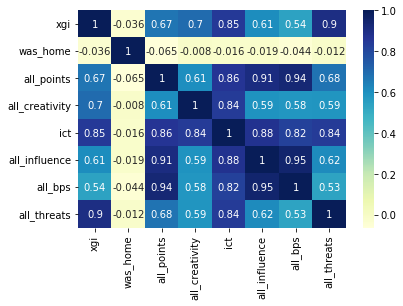

In [26]:
import matplotlib.pyplot as plt

df_new = new_history_df[["xgi", "was_home","all_points", "all_creativity", "ict", "all_influence", "all_bps", "all_threats"]]
# plotting correlation heatmap
dataplot = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

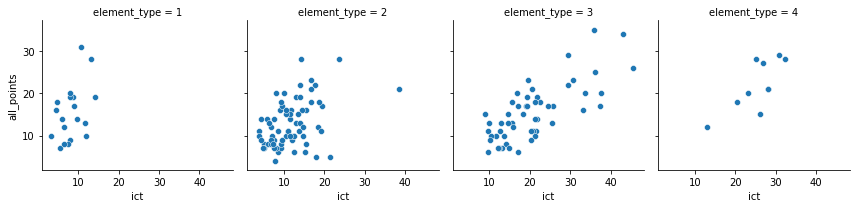

In [27]:
g = sns.FacetGrid(new_history_df.loc[new_history_df.all_bps > 40], col='element_type')
g.map(sns.scatterplot, 'ict','all_points')


In [31]:
new_history_df.loc[(new_history_df.all_bps > 80) & (new_history_df.element_type==4)].sort_values('all_points')

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,element_type,web_name,value_season,all_points,all_threats,all_creativity,all_influence,ict,xgi,all_bps
21,40,228,13,7,False,2023-02-12T16:30:00Z,3,1,23,90,1,0,0,3,0,0,0,0,0,0,1,31,41.6,33.7,19.0,9.4,1,0.08,0.04,0.11,3.59,71,7687,286114,29610,21923,4,Watkins,12.1,27,110.0,49.0,110.0,26.8,1.30,100
21,262,226,18,12,True,2023-02-11T15:00:00Z,4,1,23,76,1,1,0,1,0,0,0,0,0,0,3,42,59.6,12.2,47.0,11.9,1,0.38,0.18,0.56,1.17,61,10402,57706,12221,1819,4,Iheanacho,8.0,28,88.0,35.9,126.6,25.0,1.72,89
21,394,224,9,2,False,2023-02-11T15:00:00Z,2,0,23,90,0,0,0,2,0,0,0,0,0,0,0,5,3.4,15.1,5.0,2.4,1,0.02,0.08,0.10,1.62,57,56492,242084,69017,12525,4,Johnson,13.0,28,103.0,76.9,143.0,32.3,1.71,113
22,318,111,1,6,False,2023-02-15T19:30:00Z,1,3,23,90,1,0,0,1,0,0,0,0,0,0,0,22,34.8,1.2,45.0,8.1,1,0.30,0.04,0.34,1.62,122,9388,9556620,25885,16497,4,Haaland,14.8,29,127.0,22.9,157.0,30.7,1.95,119


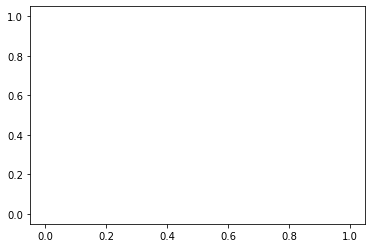

In [29]:
import matplotlib.pyplot as plt
player_df = all_history_df.loc[all_history_df.web_name == 'Almiron'] 
player_df.total_points.plot()
plt.show()

In [30]:
new_history_df.groupby('element_type')['all_points'].mean()

element_type
1    3.974359
2    4.474308
3    4.496894
4    4.760870
Name: all_points, dtype: float64